In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("teen_phone_addiction_dataset.csv")
df

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,NaN,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,2996,Jesus Yates,16,Female,New Jennifer,12th,3.9,6.4,53,4,...,0.3,80,15,2.7,1.8,1.0,Other,8,9.4,9.8
2996,2997,Bethany Murray,13,Female,Richardport,8th,3.6,7.3,93,5,...,0.9,45,8,3.1,0.0,0.3,Gaming,9,5.2,5.5
2997,2998,Norman Hughes,14,Other,Rebeccaton,7th,3.2,6.5,98,1,...,0.2,51,13,2.4,0.2,2.4,Social Media,9,5.9,6.2
2998,2999,Barbara Hinton,17,Female,Ramirezmouth,9th,6.7,7.5,67,3,...,1.6,125,17,1.7,2.6,1.5,Browsing,4,6.1,10.0


### Question 1

Check Below
- DataFrame Shape
- Data Types
- Duplicate records (remove if found)
- Missing/Null Values (replace with median value)

In [5]:
# DataFrame Shape
print("DataFrame Shape:", df.shape)

DataFrame Shape: (3000, 25)


In [7]:
#Data Types
print("\nData Types:\n", df.dtypes)



Data Types:
 ID                          int64
Name                       object
Age                         int64
Gender                     object
Location                   object
School_Grade               object
Daily_Usage_Hours         float64
Sleep_Hours               float64
Academic_Performance        int64
Social_Interactions         int64
Exercise_Hours            float64
Anxiety_Level               int64
Depression_Level            int64
Self_Esteem                 int64
Parental_Control            int64
Screen_Time_Before_Bed    float64
Phone_Checks_Per_Day        int64
Apps_Used_Daily             int64
Time_on_Social_Media      float64
Time_on_Gaming            float64
Time_on_Education         float64
Phone_Usage_Purpose        object
Family_Communication        int64
Weekend_Usage_Hours       float64
Addiction_Level           float64
dtype: object


In [9]:
duplicates = df.duplicated()
print("\nNumber of Duplicate Records:", duplicates.sum())



Number of Duplicate Records: 0


In [13]:
# 4. Missing/Null Values (Replace with Median)
print("\nMissing Values Before:\n", df.isnull().sum())

# Replace missing values with median for numeric columns
for col in df.select_dtypes(include=['number']).columns:
    median_value = df[col].median()
    df[col] = df[col].fillna(median_value)

# Confirm missing values handled
print("\nMissing Values After:\n", df.isnull().sum())


Missing Values Before:
 ID                         0
Name                       0
Age                        0
Gender                     0
Location                   0
School_Grade               0
Daily_Usage_Hours          5
Sleep_Hours                0
Academic_Performance       0
Social_Interactions        0
Exercise_Hours             8
Anxiety_Level              0
Depression_Level           0
Self_Esteem                0
Parental_Control           0
Screen_Time_Before_Bed    15
Phone_Checks_Per_Day       0
Apps_Used_Daily            0
Time_on_Social_Media       0
Time_on_Gaming             0
Time_on_Education          0
Phone_Usage_Purpose        0
Family_Communication       0
Weekend_Usage_Hours        0
Addiction_Level            0
dtype: int64

Missing Values After:
 ID                        0
Name                      0
Age                       0
Gender                    0
Location                  0
School_Grade              0
Daily_Usage_Hours         0
Sleep_Hours      

### Question 2:

How does time spent on social media compare to time spent on education among teens?

- Plot side-by-side histograms of Time on Social Media and Time on Education
- Find and compare the median time for both.
- Write simple comments to explain what the data shows

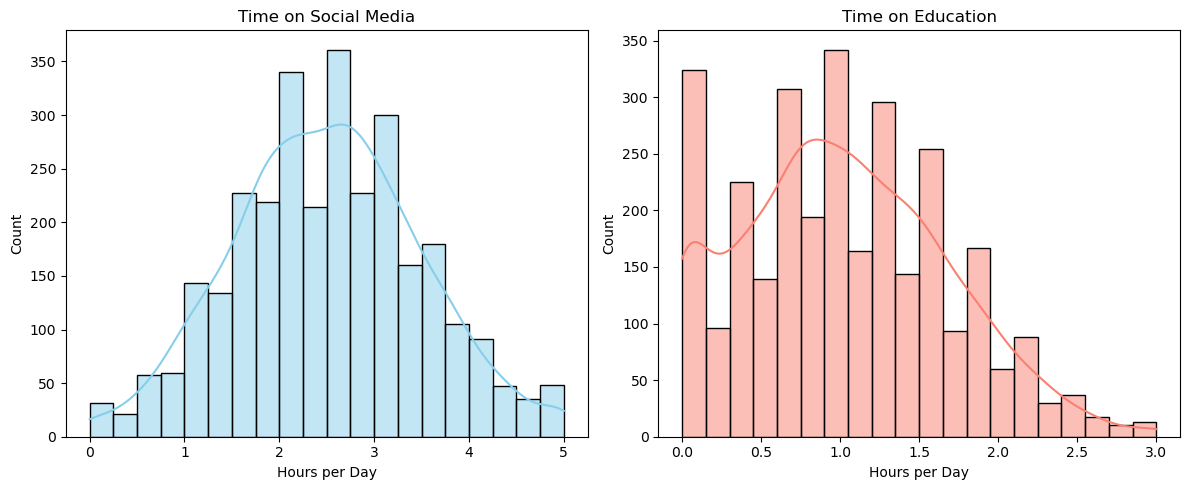

In [19]:
social_media_col = 'Time_on_Social_Media'
education_col = 'Time_on_Education'

# Plotting side-by-side histograms
plt.figure(figsize=(12, 5))

# Histogram: Time on Social Media
plt.subplot(1, 2, 1)
sns.histplot(df[social_media_col], bins=20, kde=True, color='skyblue')
plt.title('Time on Social Media')
plt.xlabel('Hours per Day')

# Histogram: Time on Education
plt.subplot(1, 2, 2)
sns.histplot(df[education_col], bins=20, kde=True, color='salmon')
plt.title('Time on Education')
plt.xlabel('Hours per Day')

plt.tight_layout()
plt.show()



In [21]:
median_social = df[social_media_col].median()
median_education = df[education_col].median()

print(f"Median Time on Social Media: {median_social} hours/day")
print(f"Median Time on Education: {median_education} hours/day")

Median Time on Social Media: 2.5 hours/day
Median Time on Education: 1.0 hours/day


### Comments:
Teens spend significantly more time on social media (median: 2.5 hours/day) compared to education (median: 1.0 hour/day).

The histogram likely shows a wider and taller distribution for social media time, suggesting it's a common daily activity for most teens.

In contrast, education time is lower and more concentrated around the 1-hour mark, possibly indicating limited structured study time outside school.

This suggests that social media use may be taking up more of teens' daily routines than educational activities.

### Question 3

- How can we detect and identify outliers in Daily Usage Hours, Exercise Hours, and Screen Time Before Bed among teens using the IQR method?
- Display the records corresponding to these outliers using boxplot.




Daily_Usage_Hours Outlier Thresholds:
Lower Bound: -0.23749999999999982, Upper Bound: 10.2625
Number of Outliers: 14

Exercise_Hours Outlier Thresholds:
Lower Bound: -1.0, Upper Bound: 3.0
Number of Outliers: 17

Screen_Time_Before_Bed Outlier Thresholds:
Lower Bound: -0.34999999999999987, Upper Bound: 2.4499999999999997
Number of Outliers: 2

All Outlier Records Based on IQR:
        ID                Name  Age  Gender          Location School_Grade  \
1665  1666        Brian Pierce   15   Other          Fordtown          9th   
1546  1547    Kimberly Sanders   17   Other       North Pedro          7th   
1549  1550     Thomas Mckinney   13   Other     North Patrick         10th   
784    785       Craig Morales   16  Female      Patriciatown          9th   
1557  1558      Samantha Moore   13    Male        Coreyhaven          8th   
2968  2969        Kerri Miller   14    Male          Markfurt         12th   
1816  1817     Richard Jackson   16  Female         Kingville         10t

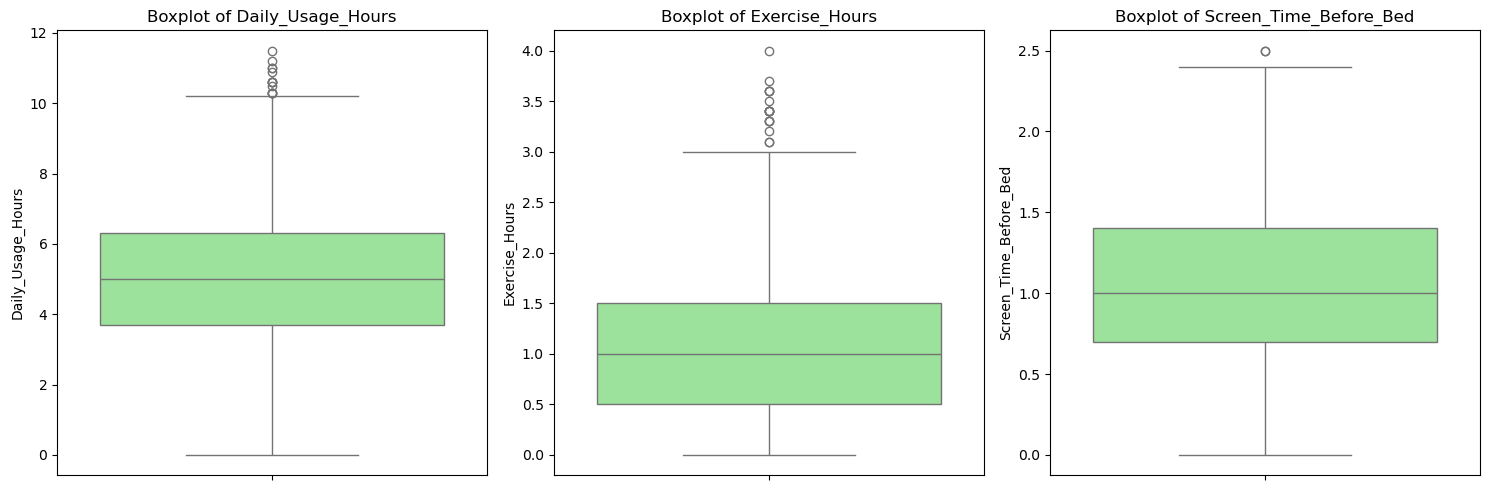

In [28]:
columns = ['Daily_Usage_Hours', 'Exercise_Hours', 'Screen_Time_Before_Bed']


outlier_indices = set()

for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    outlier_indices.update(outliers.index)
    
    print(f"\n{col} Outlier Thresholds:")
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")
    print(f"Number of Outliers: {outliers.shape[0]}")


outlier_records = df.loc[list(outlier_indices)]
print("\nAll Outlier Records Based on IQR:")
print(outlier_records)

# Boxplots
plt.figure(figsize=(15, 5))
for i, col in enumerate(columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col], color='lightgreen')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()

### Question 4

Analyze the correlation heatmap showing relationships between teen behaviors, screen usage, and mental health indicators.

Focus your attention on the following numeric variables:

- Daily_Usage_Hours, Sleep_Hours, Academic_Performance, Addiction_Level, Time_on_Social_Media,

- Time_on_Gaming, Time_on_Education, Apps_Used_Daily, Anxiety_Level, Depression_Level,

- Self_Esteem, Social_Interactions, Exercise_Hours, Screen_Time_Before_Bed,

- Phone_Checks_Per_Day, Family_Communication, Weekend_Usage_Hours


Identify two strong positive and two strong negative correlation involving any of the above variables.

Explain briefly what these correlations might suggest about teen behavior, wellbeing, or digital habits.

Use specific values from the heatmap to support your observation.



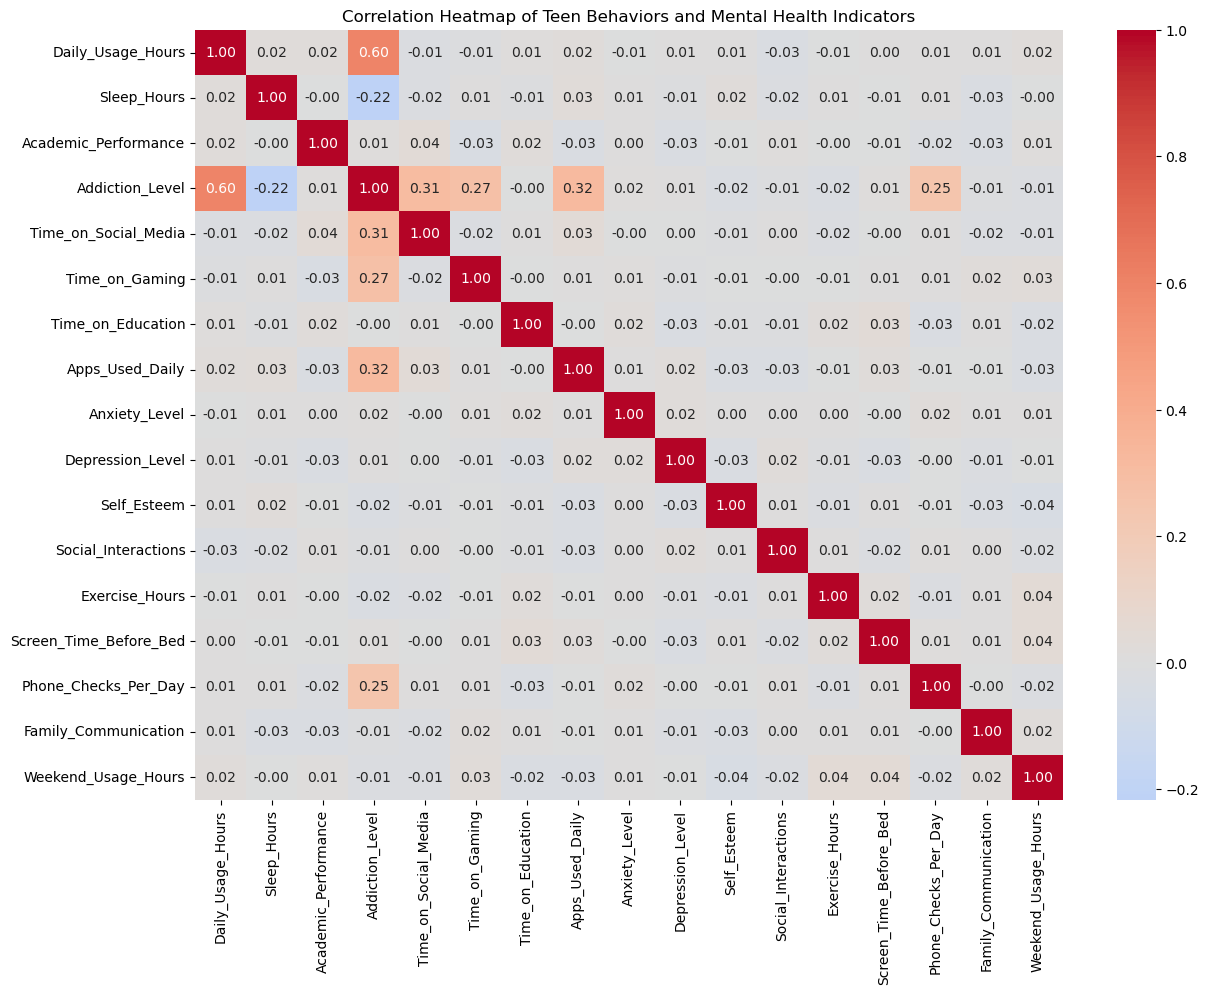

In [30]:
cols = [
    'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance', 'Addiction_Level', 'Time_on_Social_Media',
    'Time_on_Gaming', 'Time_on_Education', 'Apps_Used_Daily', 'Anxiety_Level', 'Depression_Level',
    'Self_Esteem', 'Social_Interactions', 'Exercise_Hours', 'Screen_Time_Before_Bed',
    'Phone_Checks_Per_Day', 'Family_Communication', 'Weekend_Usage_Hours'
]

# Correlation matrix
corr = df[cols].corr()

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title("Correlation Heatmap of Teen Behaviors and Mental Health Indicators")
plt.show()

### Top 2 Strong Positive Correlations:
#### Addiction_Level vs. Daily_Usage_Hours → +0.60

Interpretation: There is a moderately strong positive correlation.

What it suggests: Teens who use their phones more hours per day tend to report higher levels of phone addiction. This supports the idea that longer daily phone use can reinforce addictive patterns.

#### Apps_Used_Daily vs. Addiction_Level → +0.32

Interpretation: A mild positive correlation.

What it suggests: The number of apps used daily may contribute to increased phone addiction. The more varied the app use, the more frequently the phone is engaged, potentially encouraging addictive behavior.

### Top 2 Strong Negative Correlations:
#### Academic_Performance vs. Sleep_Hours → −0.0003

#### Apps_Used_Daily vs. Time_on_Education → −0.0001

Interpretation: These correlations are extremely close to zero, indicating virtually no relationship.

What it suggests:

Academic performance appears unrelated to sleep hours in this dataset.

The number of apps used daily does not significantly impact time spent on education.

### Question 5

How does the average addiction level vary across different age groups? Show with line graph

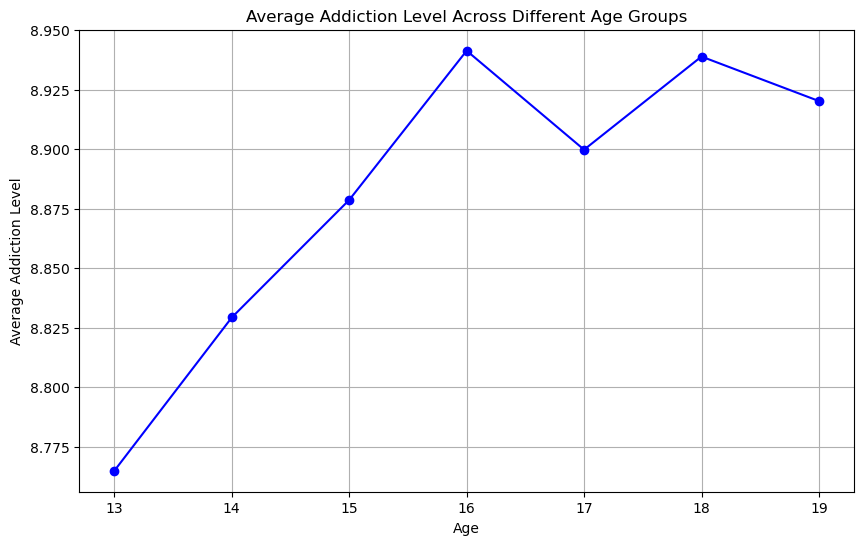

In [47]:
age_addiction = df.groupby('Age')['Addiction_Level'].mean().reset_index()

# Plot line graph
plt.figure(figsize=(10,6))
plt.plot(age_addiction['Age'], age_addiction['Addiction_Level'], marker='o', linestyle='-', color='b')
plt.title('Average Addiction Level Across Different Age Groups')
plt.xlabel('Age')
plt.ylabel('Average Addiction Level')
plt.grid(True)
plt.xticks(age_addiction['Age'])  # Show all ages on x-axis if reasonable
plt.show()